In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
file_path = './jobcomp'

#columns to analyze
columns = [
    "JobId", "UserId", "GroupId", "Name", "JobState", "Partition", 
    "TimeLimit", "StartTime", "EndTime", "NodeCnt", "ProcCnt", 
    "Account", "QOS", "SubmitTime", "EligibleTime"
]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=columns)

In [3]:
#number of lines you want to read
nlines=1500
iline=0
with open('jobcomp_scaled_60_dt_10.log', 'r') as file:    
    for line in file:
        parts = line.split()
        
        #form a dictionary with the values we want to keep (included in the columns list)
        dic={}
        for i in range(len(parts)):
            key=parts[i].split("=",1)[0]
            
            if key in columns: 
                dic[key]=parts[i].split("=",1)[1]
        
        df=df.append(dic,ignore_index=True)
        
        iline+=1
        if iline >= nlines:
            break

#Change Time columns to datetime format
Time_cols=["SubmitTime", "EligibleTime", "StartTime", "EndTime"]
for col in Time_cols:
    df[col]=pd.to_datetime(df[col])

#calculate the WaitTime and ElapsedTime
df['WaitTime']=(df['StartTime']-df['SubmitTime']).dt.seconds
df['ElapsedTime']=(df['EndTime']-df['StartTime']).dt.seconds


#change JobId, NodeCnt, and ProcCnt type to int64
df['JobId']=pd.to_numeric(df['JobId'])
df['NodeCnt']=pd.to_numeric(df['NodeCnt'])
df['ProcCnt']=pd.to_numeric(df['ProcCnt'])

In [4]:
df

,JobId,UserId,GroupId,Name,JobState,Partition,TimeLimit,StartTime,EndTime,NodeCnt,ProcCnt,Account,QOS,SubmitTime,EligibleTime,WaitTime,ElapsedTime
0,1001,user119(1119),users(100),JOB_4,FAILED,epyc-64,48,2024-05-29 23:24:23,2024-05-29 23:24:23,0,0,account75,normal,2024-05-29 23:24:23,2024-05-29 23:24:23,0,0
1,1496,user68(1068),users(100),JOB_499,COMPLETED,epyc-64,24,2024-05-29 23:29:48,2024-05-29 23:29:48,1,5,account62,normal,2024-05-29 23:29:47,2024-05-29 23:29:47,1,0
2,1866,user110(1110),users(100),JOB_869,FAILED,epyc-64,48,2024-05-29 23:33:02,2024-05-29 23:33:02,0,0,account53,normal,2024-05-29 23:33:02,2024-05-29 23:33:02,0,0
3,1517,user68(1068),users(100),JOB_520,COMPLETED,epyc-64,24,2024-05-29 23:29:48,2024-05-29 23:34:43,1,5,account62,normal,2024-05-29 23:29:47,2024-05-29 23:29:47,1,295
4,1270,user68(1068),users(100),JOB_273,COMPLETED,epyc-64,24,2024-05-29 23:29:42,2024-05-29 23:34:43,1,5,account62,normal,2024-05-29 23:29:42,2024-05-29 23:29:42,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5715,user113(1113),users(100),JOB_10568,COMPLETED,epyc-64,4,2024-05-30 00:15:32,2024-05-30 00:15:32,8,64,account10,normal,2024-05-30 00:14:50,2024-05-30 00:14:50,42,0
1496,5716,user113(1113),users(100),JOB_10569,COMPLETED,epyc-64,4,2024-05-30 00:15:32,2024-05-30 00:15:32,8,64,account10,normal,2024-05-30 00:14:50,2024-05-30 00:14:50,42,0
1497,5726,user113(1113),users(100),JOB_10579,COMPLETED,epyc-64,4,2024-05-30 00:15:32,2024-05-30 00:15:32,4,16,account10,normal,2024-05-30 00:14:50,2024-05-30 00:14:50,42,0
1498,5730,user113(1113),users(100),JOB_10583,COMPLETED,epyc-64,4,2024-05-30 00:15:32,2024-05-30 00:15:32,4,16,account10,normal,2024-05-30 00:14:51,2024-05-30 00:14:51,41,0


In [5]:
# Print the number of jobs
print("Number of jobs:", df.shape[0])

average_wait_time = df['WaitTime'].mean()
print("Average Wait Time:", average_wait_time, "seconds")

average_elapsed_time = df['ElapsedTime'].mean()
print("Average Elapsed Time:", average_elapsed_time, "seconds")

number_of_users = df['UserId'].nunique()
print("Number of unique users:", number_of_users)

Number of jobs: 1500
Average Wait Time: 309.3086666666667 seconds
Average Elapsed Time: 508.2273333333333 seconds
Number of unique users: 21


---
### History of the system load: 

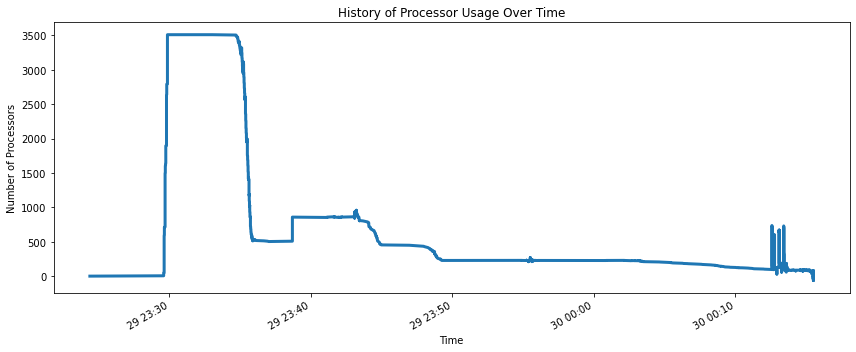

In [6]:
import matplotlib.pyplot as plt

# Create a new DataFrame to track processor usage over time
proc_usage = pd.DataFrame(columns=['Time', 'ProcCntChange'])

# Loop through each row in the DataFrame to record processor changes at start and end times
for index, row in df.iterrows():
    proc_usage = proc_usage.append({'Time': row['StartTime'], 'ProcCntChange': row['ProcCnt']}, ignore_index=True)
    proc_usage = proc_usage.append({'Time': row['EndTime'], 'ProcCntChange': -row['ProcCnt']}, ignore_index=True)

# Sort by time to maintain chronological order
proc_usage.sort_values('Time', inplace=True)

# Calculate the cumulative sum of processors in use over time
proc_usage['ProcInUse'] = proc_usage['ProcCntChange'].cumsum()

# Plot the processor usage over time
plt.figure(figsize=(12, 5))
plt.plot(proc_usage['Time'], proc_usage['ProcInUse'],lw=3)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=10)
plt.xlabel('Time')
plt.ylabel('Number of Processors')
plt.title('History of Processor Usage Over Time')
plt.gcf().autofmt_xdate()  # Automatically format x-axis labels to fit them better
plt.tight_layout()

#### Extracting the time range: 2024-05-08 06:22:00 to 2024-05-08 06:23:00

In [7]:
# Define the time range
time_range_start = pd.to_datetime("2024-05-08 06:22:00")
time_range_end = pd.to_datetime("2024-05-08 06:23:00")

# Filter the DataFrame
jobs_in_time_range = df[(df['StartTime'] >= time_range_start) & (df['StartTime'] <= time_range_end)]

jobs_in_time_range

,JobId,UserId,GroupId,Name,JobState,Partition,TimeLimit,StartTime,EndTime,NodeCnt,ProcCnt,Account,QOS,SubmitTime,EligibleTime,WaitTime,ElapsedTime


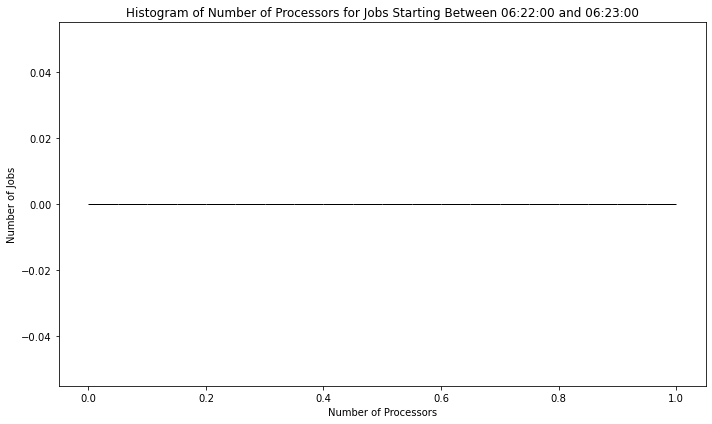

In [8]:
# Plot the histogram of the number of processors for the filtered jobs
plt.figure(figsize=(10, 6))
plt.hist(jobs_in_time_range['ProcCnt'], bins=20, edgecolor='black')
plt.xlabel('Number of Processors')
plt.ylabel('Number of Jobs')
plt.title('Histogram of Number of Processors for Jobs Starting Between 06:22:00 and 06:23:00')
plt.tight_layout()

---

#### Process count's role in wait time and the correlation with elapsed time (nay not be as relevant).

In [9]:
#check if there are any duplicates
#
#df['JobId'].duplicated()
#df[df['JobId'].duplicated()]

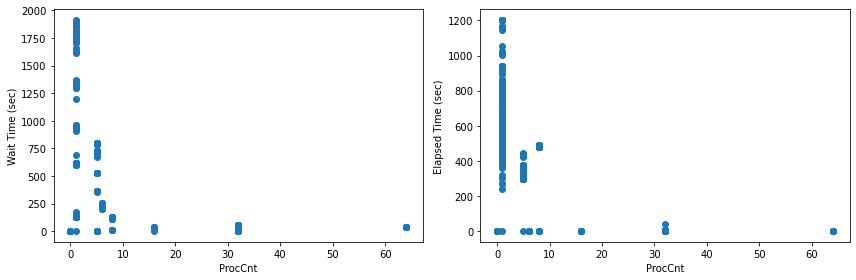

In [9]:
df_sorted_ProcCnt=df.sort_values(by = 'ProcCnt', ascending = True)

f,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(df_sorted_ProcCnt['ProcCnt'],df_sorted_ProcCnt['WaitTime'],'o')
ax[1].plot(df_sorted_ProcCnt['ProcCnt'],df_sorted_ProcCnt['ElapsedTime'],'o')

ax[0].set_ylabel('Wait Time (sec)')
ax[1].set_ylabel('Elapsed Time (sec)')

ax[0].set_xlabel('ProcCnt')
ax[1].set_xlabel('ProcCnt')

plt.tight_layout()

---

#### Wait time, elapsed time, number of jobs, and sum of cores requested per user.

/var/folders/4l/38df5lt94y735sny607xh5rh0000gn/T/ipykernel_45185/1529929539.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(usernames, rotation=45)
/var/folders/4l/38df5lt94y735sny607xh5rh0000gn/T/ipykernel_45185/1529929539.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(usernames, rotation=45)
/var/folders/4l/38df5lt94y735sny607xh5rh0000gn/T/ipykernel_45185/1529929539.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(usernames, rotation=45)
/var/folders/4l/38df5lt94y735sny607xh5rh0000gn/T/ipykernel_45185/1529929539.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3].set_xticklabels(usernames, rotation=45)


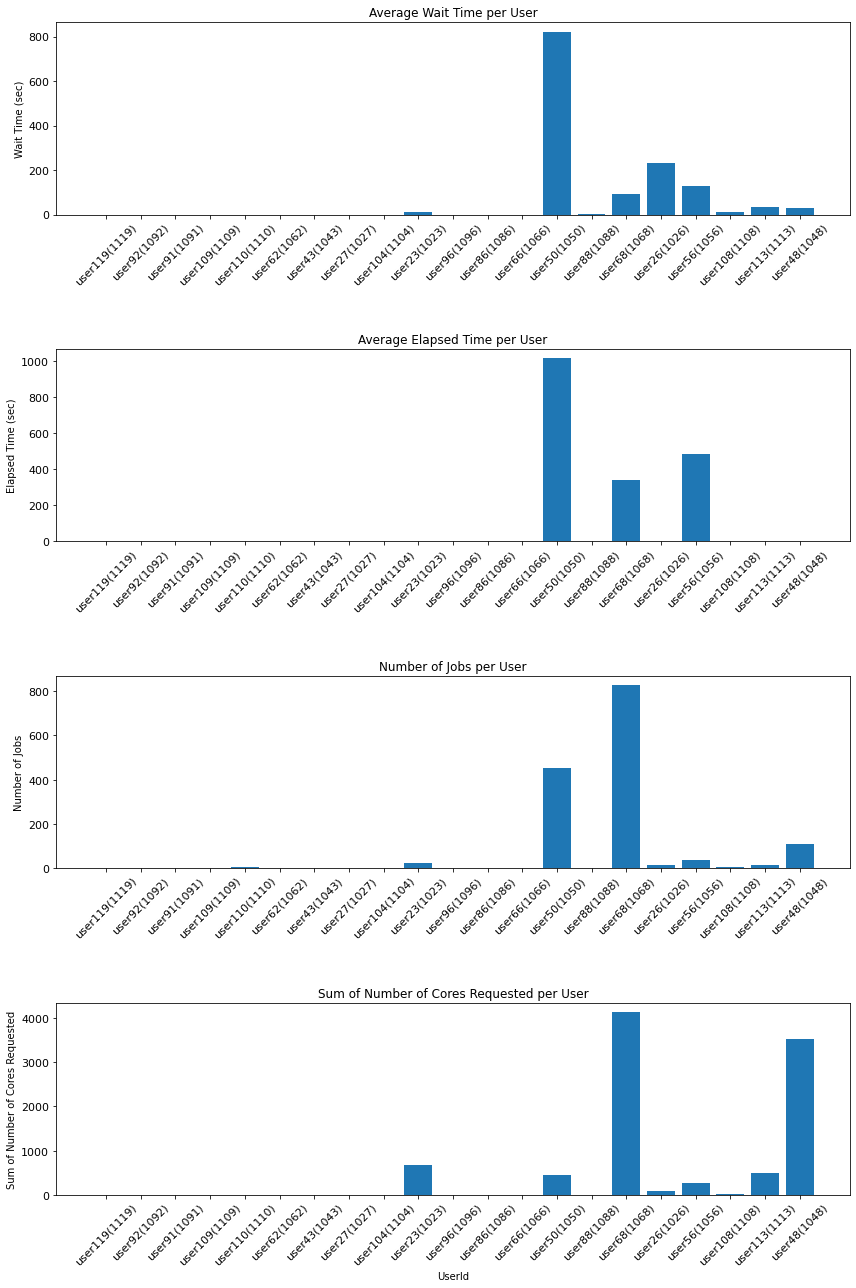

In [10]:
import matplotlib.pyplot as plt

# Prepare data for the bar plots
usernames = df_sorted_ProcCnt['UserId'].unique()
wait_times = [df_sorted_ProcCnt[df_sorted_ProcCnt['UserId'] == username]['WaitTime'].mean() for username in usernames]
elapsed_times = [df_sorted_ProcCnt[df_sorted_ProcCnt['UserId'] == username]['ElapsedTime'].mean() for username in usernames]
num_jobs = [df_sorted_ProcCnt[df_sorted_ProcCnt['UserId'] == username].shape[0] for username in usernames]
sum_cores = [df_sorted_ProcCnt[df_sorted_ProcCnt['UserId'] == username]['ProcCnt'].sum() for username in usernames]

# Create a figure with four subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 18))

# Plot the average wait time per user
axs[0].bar(usernames, wait_times)
axs[0].set_ylabel('Wait Time (sec)')
axs[0].set_xticklabels(usernames, rotation=45)
axs[0].tick_params(axis='both', which='major', labelsize=11)
axs[0].set_title('Average Wait Time per User')

# Plot the average elapsed time per user
axs[1].bar(usernames, elapsed_times)
axs[1].set_ylabel('Elapsed Time (sec)')
axs[1].set_xticklabels(usernames, rotation=45)
axs[1].tick_params(axis='both', which='major', labelsize=11)
axs[1].set_title('Average Elapsed Time per User')

# Plot the number of jobs per user
axs[2].bar(usernames, num_jobs)
axs[2].set_ylabel('Number of Jobs')
axs[2].set_xticklabels(usernames, rotation=45)
axs[2].tick_params(axis='both', which='major', labelsize=11)
axs[2].set_title('Number of Jobs per User')

# Plot the sum of number of cores requested per user
axs[3].bar(usernames, sum_cores)
axs[3].set_ylabel('Sum of Number of Cores Requested')
axs[3].set_xlabel('UserId')
axs[3].set_xticklabels(usernames, rotation=45)
axs[3].tick_params(axis='both', which='major', labelsize=11)
axs[3].set_title('Sum of Number of Cores Requested per User')

# Adjust layout to make room for the rotated x-axis labels
plt.tight_layout()
plt.subplots_adjust(hspace=0.7)

___

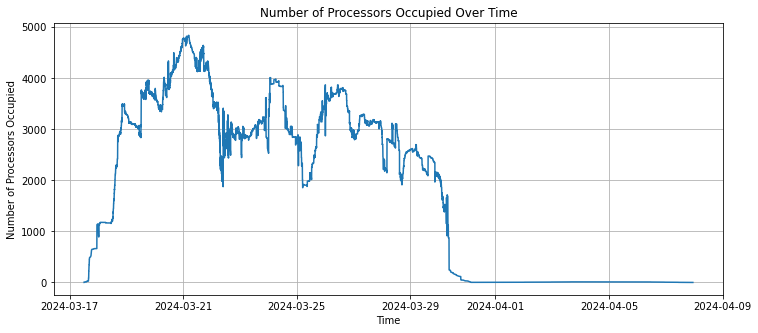

In [18]:
# Load the data from the uploaded file
file_path = 'slurm_anon_epyc64_10days'
data = pd.read_csv(file_path, delimiter='|', parse_dates=['Submit', 'Start', 'End'])

# Display the first few rows of the dataframe to verify successful loading
data.head()

# Convert the 'Start' and 'End' columns to datetime format
data['Start'] = pd.to_datetime(data['Start'], errors='coerce')
data['End'] = pd.to_datetime(data['End'], errors='coerce')

# Filter out rows with invalid datetime entries
data = data.dropna(subset=['Start', 'End'])

# Generate a time series of the number of occupied processors at each moment
time_series = pd.Series(0, index=pd.date_range(start=data['Start'].min(), end=data['End'].max(), freq='T'))

for _, row in data.iterrows():
    time_series[row['Start']:row['End']] += row['ReqCPUS']

# Plot the number of processors occupied over time
plt.figure(figsize=(12, 5))
plt.plot(time_series.index, time_series.values)
plt.title('Number of Processors Occupied Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Processors Occupied')
plt.grid(True)
plt.show()

In [20]:
data.head()

,User,JobID,Submit,Start,End,TimelimitRaw,ElapsedRaw,ReqCPUS,ReqNodes,Account,Partition,QOS,ReqMem,ReqTRES
0,user68,20254931_233,2024-03-14 20:10:51,2024-03-17 18:00:02,2024-03-18 00:01:30,1440,21688,5,1,account62,epyc-64,normal,25G,"billing=11,cpu=5,mem=25G,node=1"
1,user68,20254931_241,2024-03-14 20:10:51,2024-03-17 18:02:16,2024-03-18 00:01:11,1440,21535,5,1,account62,epyc-64,normal,25G,"billing=11,cpu=5,mem=25G,node=1"
2,user68,20254931_251,2024-03-14 20:10:51,2024-03-17 18:06:09,2024-03-18 00:05:13,1440,21544,5,1,account62,epyc-64,normal,25G,"billing=11,cpu=5,mem=25G,node=1"
3,user68,20254931_252,2024-03-14 20:10:51,2024-03-17 18:07:16,2024-03-18 00:00:15,1440,21179,5,1,account62,epyc-64,normal,25G,"billing=11,cpu=5,mem=25G,node=1"
4,user68,20254931_254,2024-03-14 20:10:51,2024-03-17 18:07:16,2024-03-18 00:10:29,1440,21793,5,1,account62,epyc-64,normal,25G,"billing=11,cpu=5,mem=25G,node=1"
